# Analisis exploratorio: Localizando los daños del terremoto

Vimos en gráficos de este trabajo, que la cantidad de edificios esta relacionada con la cantidad de familias que viven ahi. Veamos en que zonas se encuentran

## Importo librerias y cargo los datos

In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Levantar los datos de cada edificio/casa
df = pd.read_csv('datos/train_values.csv',nrows=0)
columnas = df.columns.to_list()
datatypes = {
    **{columnas[0]:np.int32}\
    , **{column:np.int16 for column in columnas[1:8] + columnas[27:28]}\
    , **{column:'category' for column in columnas[8:15] + columnas[26:27]}\
    , **{column:np.bool for column in columnas[15:26] + columnas[28:39]}
}
edificios = pd.read_csv('datos/train_values.csv',dtype=datatypes)

In [3]:
#Datos de el daño por edificio
daños = pd.read_csv('datos/train_labels.csv',dtype={'building_id':np.int32,'damage_grade':'category'})

##  Daños y localizaciones
Veamos que zonas son las mas afectadas por el terremoto en terminos cuantitativos en las regiones más grandes

In [4]:
edificios_geo = edificios.loc[:,['building_id','geo_level_1_id']]
edificios_geo_daños = pd.merge(edificios_geo,daños,on='building_id',how='inner').groupby(['geo_level_1_id','damage_grade']).count().unstack()
edificios_geo_daños.head(5)

building_id             
damage_grade             1      2     3
geo_level_1_id                         
0                      337   3075   599
1                      411   1985   305
2                       85    610   236
3                      245   4550  2745
4                      521  11164  2883

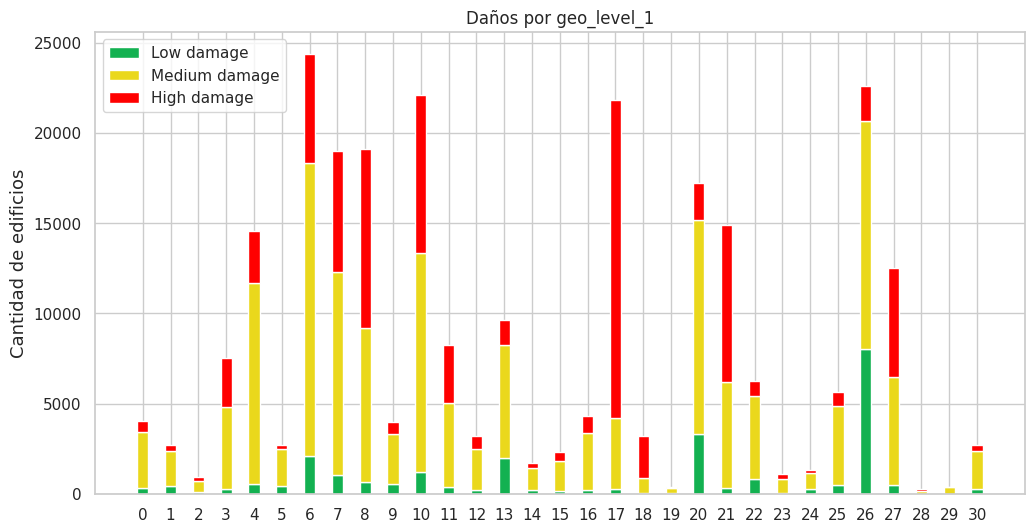

In [22]:
labels = edificios_geo_daños.index.to_list()
low_affected = np.array(edificios_geo_daños[('building_id','1')].to_list())
medium_affected = np.array(edificios_geo_daños[('building_id','2')].to_list())
high_affected = np.array(edificios_geo_daños[('building_id','3')].to_list())

width = 0.4
fig, ax = plt.subplots(figsize=(12,6))

ax.bar(labels, low_affected, width, label='Low damage',color='#13b151')
ax.bar(labels, medium_affected, width, bottom=low_affected,label='Medium damage', color='#ead81c')
ax.bar(labels, high_affected, width, bottom=low_affected+medium_affected,label='High damage', color='red')

ax.set_title('Daños por geo_level_1')
ax.legend()
plt.xticks(labels)
ax.set_ylabel('Cantidad de edificios', fontsize = 13)
plt.show()

La región que más recibió daños graves es la 17 por amplia diferencia. Le siguen de la 6 a la 10 y la 21.

Ordenemos por daño recibido a ver si nuestras afirmaciones son correctas

In [6]:
edificios_geo_daños_sorted = edificios_geo_daños.sort_values(by=('building_id','3'),ascending=False)
edificios_geo_daños_sorted.head(5)

building_id              
damage_grade             1      2      3
geo_level_1_id                          
17                     285   3913  17615
8                      654   8513   9913
10                    1211  12107   8761
21                     322   5857   8710
7                     1033  11273   6688

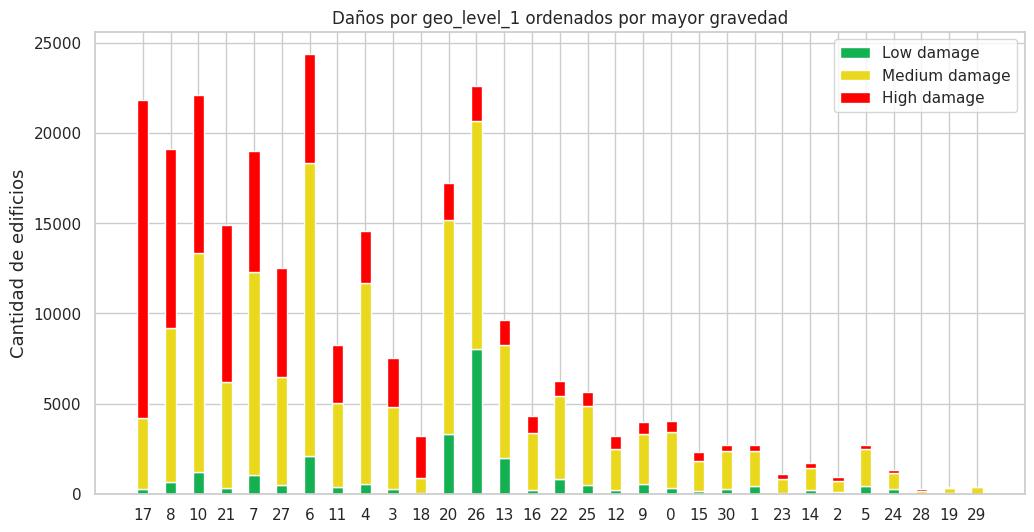

In [19]:
labels = edificios_geo_daños_sorted.index.to_list()
labels = [str(region) for region in labels] #para que no ordene los index, convierto los labels en string
low_affected = np.array(edificios_geo_daños_sorted[('building_id','1')].to_list())
medium_affected = np.array(edificios_geo_daños_sorted[('building_id','2')].to_list())
high_affected = np.array(edificios_geo_daños_sorted[('building_id','3')].to_list())

width = 0.4
fig, ax = plt.subplots(figsize=(12,6))

ax.bar(labels, low_affected, width, label='Low damage',color='#13b151')
ax.bar(labels, medium_affected, width, bottom=low_affected,label='Medium damage', color='#ead81c')
ax.bar(labels, high_affected, width, bottom=low_affected+medium_affected,label='High damage', color='red')

ax.set_title('Daños por geo_level_1 ordenados por mayor gravedad')
ax.legend()
plt.xticks(labels)
ax.set_ylabel('Cantidad de edificios', fontsize = 13)
plt.show()

Las preguntas que nos podemos hacer son las siguientes:
* ¿Aquellas regiones que más cantidad de daños graves tuvieron, están más cerca del epicentro?
* ¿Puede que esto sea fruto de que simplemente haya más cantidad de edificios en esa zona?

Estas preguntas están relacionadas, veamos que pasa si ordenamos de manera porcentual respecto de la cantidad de edificios de la region

In [8]:
edificios_geo_daños_perc = edificios_geo_daños.div(edificios_geo_daños.sum(axis=1), axis=0).sort_values(by=('building_id','3'),ascending=False)
edificios_geo_daños_perc.head()

building_id                                          
damage_grade                      1                    2                    3
geo_level_1_id                                                               
17                             0.01                 0.18                 0.81
18                             0.02                 0.25                 0.73
21                             0.02                 0.39                 0.58
8                              0.03                 0.45                 0.52
27                             0.04                 0.48                 0.48

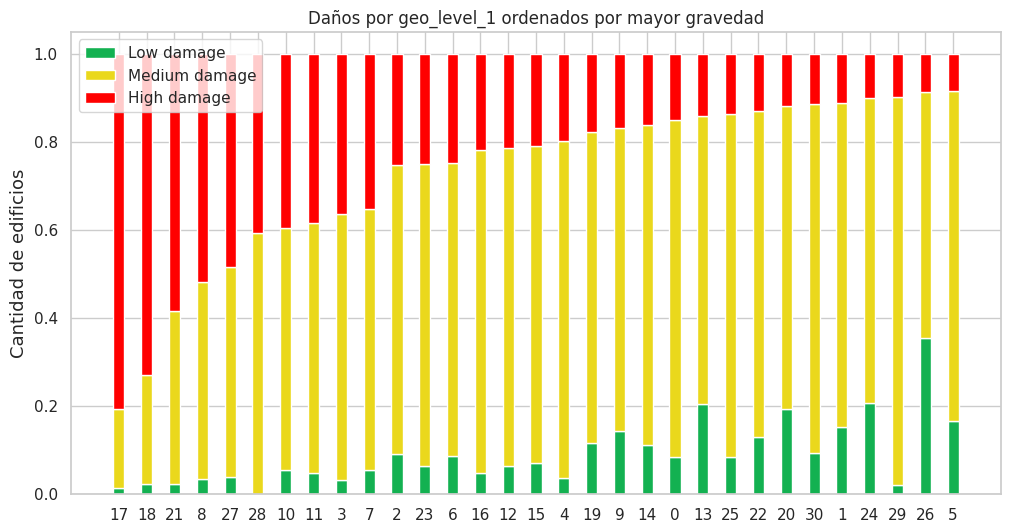

In [21]:
labels = edificios_geo_daños_perc.index.to_list()
labels = [str(region) for region in labels] #para que no ordene los index, convierto los labels en string
low_affected = np.array(edificios_geo_daños_perc[('building_id','1')].to_list())
medium_affected = np.array(edificios_geo_daños_perc[('building_id','2')].to_list())
high_affected = np.array(edificios_geo_daños_perc[('building_id','3')].to_list())

width = 0.4
fig, ax = plt.subplots(figsize=(12,6))

ax.bar(labels, low_affected, width, label='Low damage',color='#13b151')
ax.bar(labels, medium_affected, width, bottom=low_affected,label='Medium damage', color='#ead81c')
ax.bar(labels, high_affected, width, bottom=low_affected+medium_affected,label='High damage', color='red')

ax.set_title('Daños por geo_level_1 ordenados por mayor gravedad')
ax.legend()
plt.xticks(labels)
ax.set_ylabel('Cantidad de edificios', fontsize = 13)
plt.show()

Aca se puede ver que por ejemplo la región 18 fue bastante afectada respecto de la cantidad de edificios en la región. Esto no se veía en el grafico anterior. Lo tendremos en cuenta para más adelante

Ya sabemos en que zonas se encuentran las mas afectadas en terminos de cantidad de edificios. Veamos que podemos averiguar de estas zonas

## Estructuras en las zonas más afectadas

Tomemos las 10 regiones mas dañadas gravemente segun la cantidad de edificios. (Pues ya hicimos las estructuras por zona)

In [10]:
top_10_hd_ids = edificios_geo_daños_sorted.index.to_list()[:10]
top_10_hd_ids

[17, 8, 10, 21, 7, 27, 6, 11, 4, 3]

In [11]:
superstructures = edificios.loc[:,['geo_level_1_id']+columnas[15:26]] # building_id + secondary_use
superstructures_top10_hd = superstructures.groupby('geo_level_1_id').sum()
superstructures_top10_hd = superstructures_top10_hd.loc[superstructures_top10_hd.index.isin(top_10_hd_ids),:]
superstructures_top10_hd = superstructures_top10_hd.loc[top_10_hd_ids,:].transpose()
superstructures_top10_hd


geo_level_1_id,17,8,10,21,7,27,6,11,4,3
has_superstructure_adobe_mud,618,771,738,260,381,5548,3680,2778,69,4457
has_superstructure_mud_mortar_stone,20257,17290,19391,14301,15907,4689,18239,3502,14259,1470
has_superstructure_stone_flag,1383,491,938,199,1160,383,85,388,518,55
has_superstructure_cement_mortar_stone,341,259,413,117,479,244,113,105,131,61
has_superstructure_mud_mortar_brick,231,286,199,14,1012,4353,1725,3477,13,3950
has_superstructure_cement_mortar_brick,757,558,1064,252,784,1693,1673,899,63,870
has_superstructure_timber,3675,3201,6242,2290,4622,2238,2546,2263,2522,1052
has_superstructure_bamboo,1046,1015,420,338,411,828,395,1037,1469,388
has_superstructure_rc_non_engineered,555,701,782,376,843,586,984,311,452,345
has_superstructure_rc_engineered,157,255,376,71,235,309,848,132,44,122


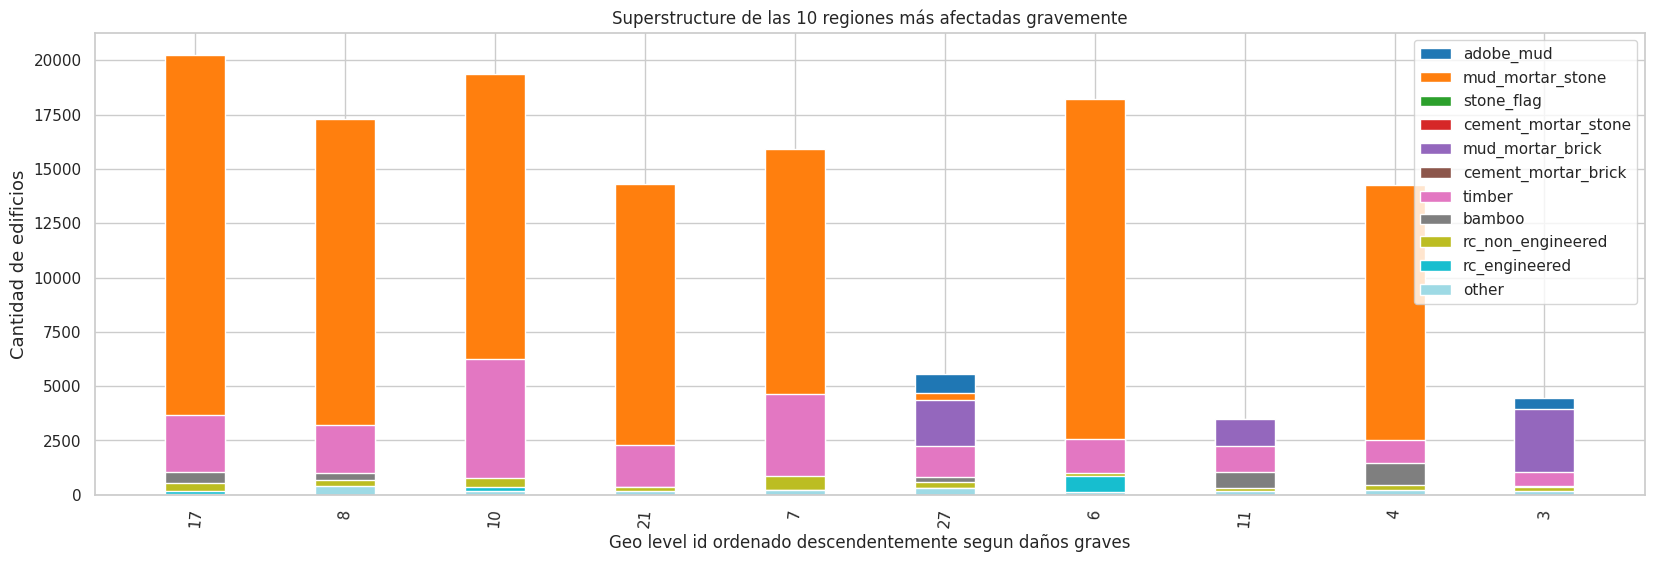

In [23]:
labels = columnas[15:26]
labels = [superstructure.split("superstructure_")[-1] for superstructure in labels]

superstructures_all_cants = superstructures_top10_hd.values.tolist()

#Eje x
levels_id = superstructures_top10_hd.columns.to_list()
levels_id = [str(level_id) for level_id in levels_id]

#Diseño
width = 0.4
fig, ax = plt.subplots(figsize=(20,6))
cmap = plt.cm.get_cmap("tab20", len(labels))

for i in range(len(labels)):
    ant = None
    superstructures_cant = np.array(superstructures_all_cants[i])
    ax.bar(levels_id, superstructures_cant, width,bottom= ant, label=labels[i],color=cmap(i))
    if ant is None:
        ant = superstructures_cant
    else: ant+= superstructures_cant

ax.set_title('Superstructure de las 10 regiones más afectadas gravemente')
ax.legend()
plt.xticks(levels_id,rotation=85)
ax.set_xlabel('Geo level id ordenado descendentemente segun daños graves')
ax.set_ylabel('Cantidad de edificios', fontsize = 13)

plt.show()

En todas estas regiones tienen como material más usado al 'mud_mortar_stone', salvo las regiones 27,11 y 3.

En las regiones 27,11 y 3 el material más usado es el 'mud_mortar_brick'

Lo importante de esta visualización es como se distribuye el material según va decreciendo en cantidad de afectados gravemente. Sin embargo no se ve una tendencia respecto a esto

## Altura y zonas afectadas

Queremos saber si la altura está relacionada con los daños recibidos por los edificios. Realizemos este análisis con los primeros 10 'height_percentage', pues los demás rompen la escala

In [13]:
daños_altura = pd.merge(edificios[['building_id','height_percentage']],daños,on='building_id',how='inner').iloc[:,1:]
daños_altura['cantidad_edificios'] = 1
daños_altura = daños_altura.groupby(['height_percentage','damage_grade']).count().unstack()
daños_altura_10 = daños_altura.head(10)
daños_altura_10

cantidad_edificios              
damage_grade                       1      2      3
height_percentage                                 
2                               1502   4841   2962
3                               6122  13636   6199
4                               3652  22087  12024
5                               5280  46753  26480
6                               3269  25840  17368
7                               2265  19615  13585
8                                574   8077   5251
9                                846   3076   1454
10                               707   2562   1223
11                                62    594    261

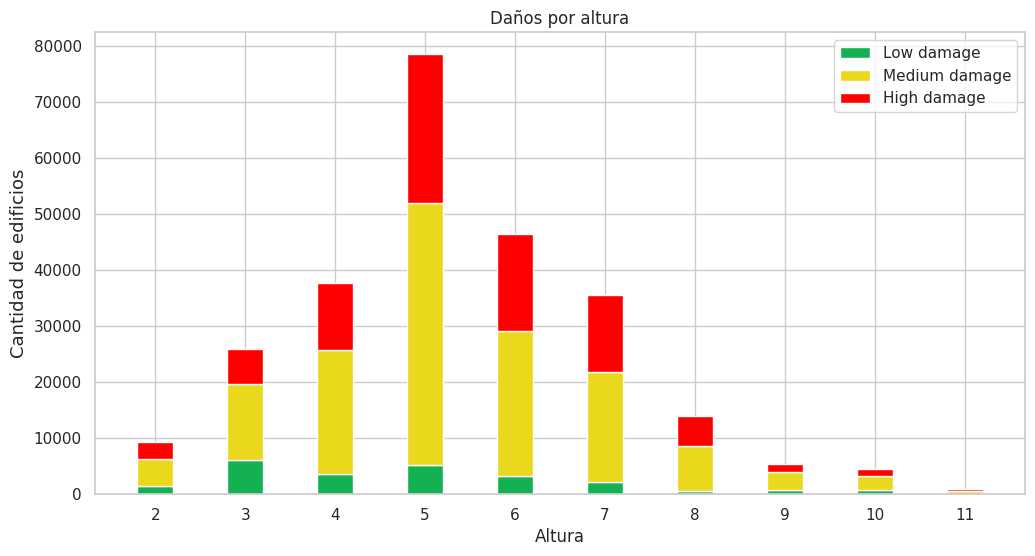

In [24]:
labels = daños_altura_10.index.to_list()
low_affected = np.array(daños_altura_10[('cantidad_edificios','1')].to_list())
medium_affected = np.array(daños_altura_10[('cantidad_edificios','2')].to_list())
high_affected = np.array(daños_altura_10[('cantidad_edificios','3')].to_list())

width = 0.4
fig, ax = plt.subplots(figsize=(12,6))

ax.bar(labels, low_affected, width, label='Low damage',color='#13b151')
ax.bar(labels, medium_affected, width, bottom=low_affected,label='Medium damage', color='#ead81c')
ax.bar(labels, high_affected, width, bottom=low_affected+medium_affected,label='High damage', color='red')

ax.set_xlabel('Altura')
ax.set_title('Daños por altura')
ax.legend()
plt.xticks(labels)
ax.set_ylabel('Cantidad de edificios', fontsize = 13)
plt.show()

A simple vista parece ser que de manera porcentual crece el daño grave cuanto mas alto es el edificio, verifiquemos esto

In [15]:
daños_altura_10_perc = daños_altura_10.div(daños_altura_10.sum(axis=1), axis=0)
daños_altura_10_perc.head()

cantidad_edificios                       \
damage_grade                         1                    2   
height_percentage                                             
2                                 0.16                 0.52   
3                                 0.24                 0.53   
4                                 0.10                 0.58   
5                                 0.07                 0.60   
6                                 0.07                 0.56   

                                        
damage_grade                         3  
height_percentage                       
2                                 0.32  
3                                 0.24  
4                                 0.32  
5                                 0.34  
6                                 0.37

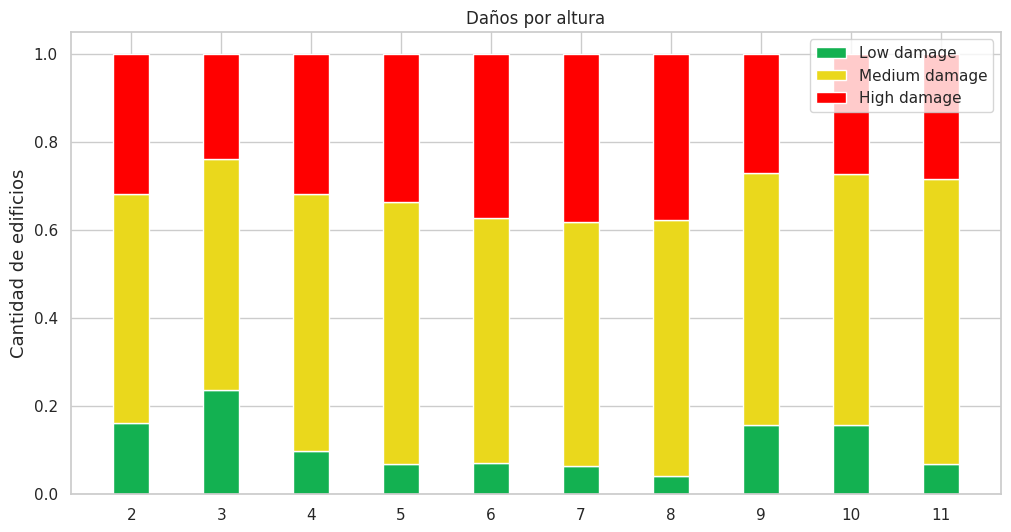

In [25]:
labels = daños_altura_10_perc.index.to_list()

low_affected = np.array(daños_altura_10_perc[('cantidad_edificios','1')].to_list())
medium_affected = np.array(daños_altura_10_perc[('cantidad_edificios','2')].to_list())
high_affected = np.array(daños_altura_10_perc[('cantidad_edificios','3')].to_list())

width = 0.4
fig, ax = plt.subplots(figsize=(12,6))

ax.bar(labels, low_affected, width, label='Low damage',color='#13b151')
ax.bar(labels, medium_affected, width, bottom=low_affected,label='Medium damage', color='#ead81c')
ax.bar(labels, high_affected, width, bottom=low_affected+medium_affected,label='High damage', color='red')

ax.set_title('Daños por altura')
ax.legend()
plt.xticks(labels)
ax.set_ylabel('Cantidad de edificios', fontsize = 13)

plt.show()

Nuestra visión no es del todo errada pues se ve como crece hasta casi un 40% los daños graves (altura 6 y 7) pero luego se ve como vuelve al 25%. Sin embargo puede estar siendo afectada por la cantidad de edificios

## Pisos y zonas afectadas

Normalmente cuando ocurren terremotos se piensa en los edificios más altos derrumbados. Veamos que daños sufrieron los edificios con más plantas. Debería ser similar al análisis de altura. Comprobémoslo

In [17]:
daños_pisos = pd.merge(edificios[['building_id','count_floors_pre_eq']],daños,on='building_id',how='inner').iloc[:,1:]
daños_pisos['cantidad_edificios'] = 1
daños_pisos = daños_pisos.groupby(['count_floors_pre_eq','damage_grade']).count().unstack()
daños_pisos

cantidad_edificios              
damage_grade                         1      2      3
count_floors_pre_eq                                 
1                                 8969  20798  10674
2                                12593  93968  50062
3                                 2537  28479  24601
4                                  707   3374   1343
5                                  254   1481    511
6                                   53    133     23
7                                   10     25      4
8                                    0      1      0
9                                    1      0      0

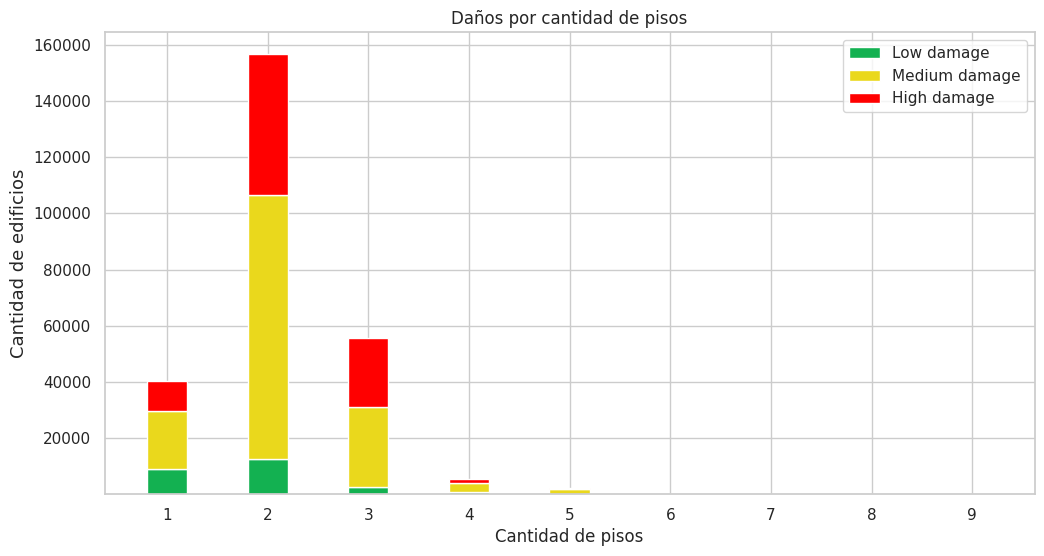

In [27]:
labels = daños_pisos.index.to_list()
low_affected = np.array(daños_pisos[('cantidad_edificios','1')].to_list())
medium_affected = np.array(daños_pisos[('cantidad_edificios','2')].to_list())
high_affected = np.array(daños_pisos[('cantidad_edificios','3')].to_list())

width = 0.4
fig, ax = plt.subplots(figsize=(12,6))

ax.bar(labels, low_affected, width, label='Low damage',color='#13b151')
ax.bar(labels, medium_affected, width, bottom=low_affected,label='Medium damage', color='#ead81c')
ax.bar(labels, high_affected, width, bottom=low_affected+medium_affected,label='High damage', color='red')

ax.set_xlabel('Cantidad de pisos')
ax.set_title('Daños por cantidad de pisos')
ax.legend()
plt.xticks(labels)
ax.set_ylabel('Cantidad de edificios', fontsize = 13)
plt.show()

No se ve una tendencia marcada con la cantidad de pisos ya que la cantidad de edificios con 4 pisos o mas es muy poco representativa